In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **1. ĐỌC DATA**

In [4]:
data_stroke = pd.read_csv("data_stroke.csv")
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data_stroke.rename(columns = {'Residence_type':'residence_type'}, inplace = True) 

In [6]:
#Hiển thị 5 dòng đầu tiên
data_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#Hiển thị 5 dòng cuối cùng
data_stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
#Hiển thị 5 dòng ngẫu nhiên
data_stroke.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4769,12037,Female,73.0,0,0,Yes,Self-employed,Rural,77.29,22.6,never smoked,0
2246,58645,Female,76.0,0,0,Yes,Private,Rural,96.24,25.4,never smoked,0
2108,60210,Female,22.0,0,0,No,Private,Urban,73.50,41.3,smokes,0
1506,64132,Male,67.0,0,1,Yes,Self-employed,Rural,95.88,31.9,Unknown,0
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1


In [9]:
#Hiển thị đặc trưng thống kê các thuộc tính số
data_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
#Hiển thị các đặc trưng thống kê Object
data_stroke.describe(include="O")

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
data_stroke["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

**Thuộc tính gender có 3 giá trị:Male, Female, Other --> Xử lý dữ liệu ngoại lai** 

In [13]:
data_stroke["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [14]:
data_stroke["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [15]:
data_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
data_stroke[data_stroke["smoking_status"] == "Unknown"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [17]:
data_stroke[data_stroke["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [18]:
stroke = data_stroke["stroke"].value_counts()
stroke

stroke
0    4861
1     249
Name: count, dtype: int64

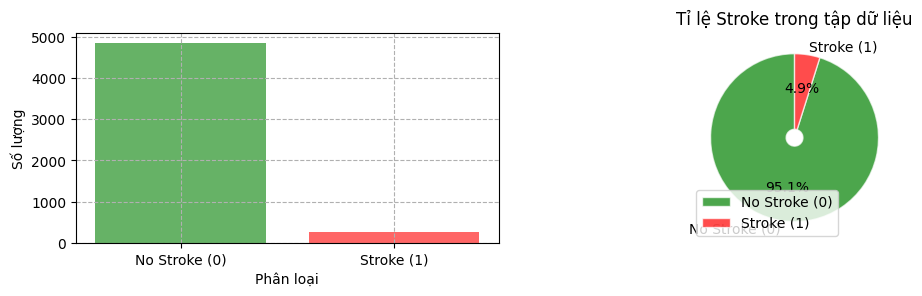

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

plt.bar(stroke.index,stroke.values,
        alpha = 0.6,
       color=["green","red"])
plt.xticks(stroke.index, ["No Stroke (0)", "Stroke (1)"])
plt.xlabel("Phân loại")
plt.ylabel("Số lượng")
plt.grid(ls="--")

plt.subplot(2,2,2)
plt.pie(stroke ,
       labels=["No Stroke (0)", "Stroke (1)"],
       autopct="%1.1f%%",
       colors=["green", "red"],
       startangle=90,
       wedgeprops=dict(width=0.9,edgecolor='w', alpha=0.7))
plt.title("Tỉ lệ Stroke trong tập dữ liệu")
plt.legend()
plt.show()

**Ta thấy với tập dữ liệu này. Tỉ lệ của lớp 0 chiếm 95.1% còn tỉ lệ lớp 1 chiếm 4.9% -->Tập dữ liệu bị mất cân bằng trung bình**

#### **Các công việc cần làm**
1. Xử lý dữ liệu ngoại lai thuộc tính gender
2. Xử lý dữ liệu missing thuộc tính bmi
3. Chuẩn hóa các thuộc tính
4. Xử lý mất cân bằng dữ liệu


### **2. Xử lý dữ liệu**

#### **2.1 Xử lý dữ liệu ngoại lai thuộc tính gender**

In [24]:
data_stroke["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [25]:
data_stroke.loc[data_stroke["gender"] == "Other", :]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [26]:
#Giá trị Female xuất hiện nhiều nhất --> Thay Other bằng Female
data_stroke["gender"] = data_stroke["gender"].replace("Other" ,"Female")

In [27]:
data_stroke.loc[data_stroke["gender"] =="Other",:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


#### **2.2 Xử lý dữ liệu missing bmi**

In [29]:
#Dùng phương pháp nội suy tuyến tính
data_stroke["bmi"]=data_stroke["bmi"].interpolate(method="linear")

In [30]:
data_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

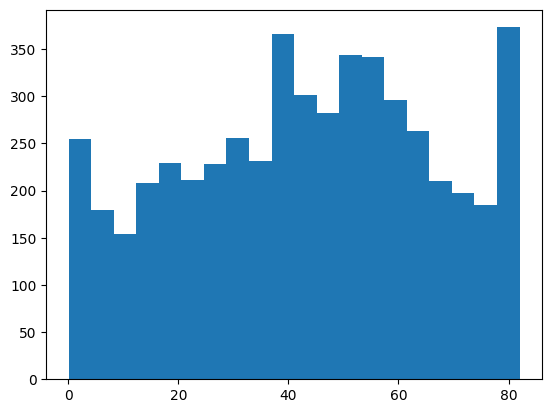

In [31]:
plt.hist(data_stroke.age ,bins=20)
plt.show()

In [32]:
g = sns.FacetGrid(data_stroke,col="stroke")
g.map(plt.hist,"age",bins= 40)

NameError: name 'sns' is not defined

In [47]:
data_stroke[["gender","stroke"]].groupby(["gender"],as_index = False).mean().sort_values(by="stroke", ascending= False)

,gender,stroke
1,Male,0.051064
0,Female,0.047078


In [49]:
data_stroke[["work_type","stroke"]].groupby(["work_type"],as_index = False).mean().sort_values(by="stroke",ascending=False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


In [51]:
data_stroke[["residence_type","stroke"]].groupby(["residence_type"],as_index = False).mean().sort_values(by="stroke",ascending=False)

,residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


#### **2.3 Chuẩn hóa các thuộc tính**

In [53]:
data_stroke.describe(include="O")

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2995,3353,2925,2596,1892


In [55]:
#Thuộc tính gender : Female -> 0 , Male --> 1
data_stroke["gender"] = data_stroke["gender"].map({"Female":0, "Male":1})

In [57]:
#Thuộc tính ever_married: Yes --> 1 , No --> 0
data_stroke["ever_married"] = data_stroke["ever_married"].map({"Yes":1,"No":0})

In [61]:
#Thuộc tính work_type: Private --> 0 , Self-employed --> 1 , children --> 2 , Govt_job --> 3 , Never_worked --> 4
data_stroke["work_type"] = data_stroke["work_type"].map({"Private" : 0 ,"Self-employed" : 1 , "children" : 2 , "Govt_job" :3 , "Never_worked" :4})

In [69]:
#Thuộc tính smoking_status: never smoked --> 0 , Unknown --> 1 , formerly smoked -->2  , smokes -->3
data_stroke["smoking_status"]= data_stroke["smoking_status"].map({"never smoked" : 0 , "Unknown": 1 , "formerly smoked":2  , "smokes":3})

In [71]:
#Thuộc tính residence_type: Urban --> 0 , Rural --> 1
data_stroke["residence_type"] = data_stroke["residence_type"].map({"Urban":0, "Rural":1})

In [85]:
data_stroke.loc[data_stroke["age"] <= 30 ,"age"] =0 #thanh niên
data_stroke.loc[(data_stroke["age"] > 30) & (data_stroke["age"] <=50) ,"age"] =1 #trung niên trẻ
data_stroke.loc[(data_stroke["age"] > 50) & (data_stroke["age"] <=65) ,"age"] =2 #trung niên lớn
data_stroke.loc[data_stroke["age"] > 65 ,"age"] =3 #cao tuổi

In [95]:
data_stroke.loc[data_stroke["avg_glucose_level"] <=140 ,"avg_glucose_level"] =0
data_stroke.loc[(data_stroke["avg_glucose_level"] > 140) & (data_stroke["avg_glucose_level"] <=200),"avg_glucose_level"]=1
data_stroke.loc[data_stroke["avg_glucose_level"] >200 ,"avg_glucose_level"] =2

<img src="tieuduong.jpg">

In [119]:
data_stroke.loc[data_stroke["bmi"] < 18.5,"bmi"] =0
data_stroke.loc[(data_stroke["bmi"] >=18.5) & (data_stroke["bmi"] <25) ,"bmi"] = 1
data_stroke.loc[(data_stroke["bmi"] >=25) & (data_stroke["bmi"] <30) ,"bmi"] = 2
data_stroke.loc[(data_stroke["bmi"] >=30) & (data_stroke["bmi"] <35) ,"bmi"] = 3
data_stroke.loc[data_stroke["bmi"] >= 35,"bmi"] =4

<img src = "bmi.jpg">

In [131]:
data_stroke.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3075,58586,1,3.0,1,1,1,1,0,0.0,2.0,3,0
1632,57485,0,0.0,0,0,0,2,1,0.0,1.0,1,0
98,8154,1,2.0,1,0,1,3,0,0.0,2.0,2,1
1841,71917,1,0.0,0,0,0,2,1,2.0,2.0,0,0
143,37651,0,3.0,1,1,0,1,0,0.0,4.0,0,1


#### **2.4 Xử lý mất cân bằng dữ liệu**

In [141]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X,y)



#### **Tách dữ liệu**

In [127]:
X = data_stroke.drop(['id','stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.0,0,1,1,0,0,2.0,4.0,2
1,0,2.0,0,0,1,1,1,2.0,3.0,0
2,1,3.0,0,1,1,0,1,0.0,3.0,0
3,0,1.0,0,0,1,0,0,1.0,3.0,3
4,0,3.0,1,0,1,1,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,3.0,1,0,1,0,0,0.0,2.0,0
5106,0,3.0,0,0,1,1,0,0.0,4.0,0
5107,0,1.0,0,0,1,1,1,0.0,3.0,0
5108,1,2.0,0,0,1,0,1,1.0,2.0,2


In [129]:
y = data_stroke['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=0.8,
                                                 shuffle=True,
                                                random_state=42)

print("Tổng số mẫu trong tập dữ liệu: ",len(y))
print("Tổng số mẫu trên tập Train: ",len(y_train))
print("Tổng số mẫu trên tập Test: ",len(y_test))

Tổng số mẫu trong tập dữ liệu:  5110
Tổng số mẫu trên tập Train:  4088
Tổng số mẫu trên tập Test:  1022


In [143]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X,y)


counter4 = Counter(y4)
print(counter4)

Counter({0: 3037, 1: 2430})


In [157]:
data_stroke_ok = pd.concat([pd.DataFrame(X4, columns=X.columns),
                            pd.Series(y4, name='stroke')], axis=1)

In [163]:
data_stroke_ok["stroke"].value_counts(normalize=True)

stroke
0    0.555515
1    0.444485
Name: proportion, dtype: float64

**Cân bằng cả Train cả Test** <br>
**Cân bằng Train thôi**